### Data generation process

In this Notebook we make data visualization and analytics.

In [1]:
import matplotlib.pyplot as plt
from data_gen import simulate_private_equity_cashflows
cashflows = simulate_private_equity_cashflows()

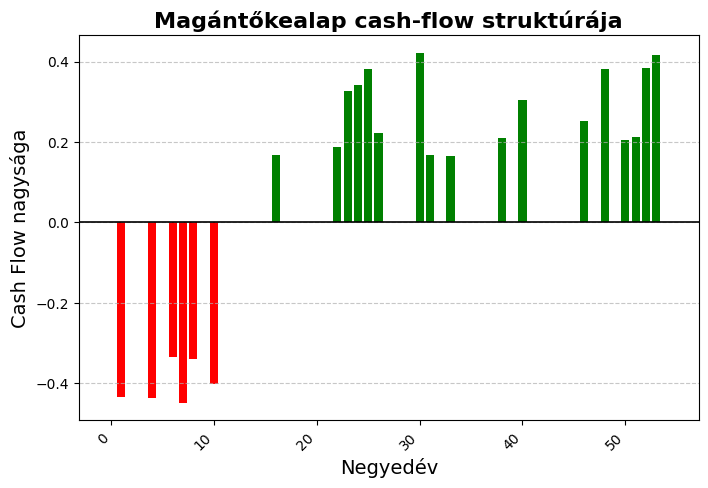

In [11]:
df = cashflows[cashflows['FundID'] == 176]
plt.figure(figsize=(8, 5))
bars = plt.bar(df['Quarter'], df['Cashflow'], color=['green' if x > 0 else 'red' for x in df['Cashflow']])

# Add title and labels
plt.title('Magántőkealap cash-flow struktúrája', fontsize=16, fontweight='bold')
plt.xlabel('Negyedév', fontsize=14)
plt.ylabel('Cash Flow nagysága', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding horizontal line at y=0 for visual separation
plt.axhline(0, color='black', linewidth=1.2)

# Add gridlines on y-axis for better readability of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [8]:
cashflows

,FundID,VintageYear,Strategy,Geography,FundQuality,Quarter,Cashflow,date
0,0,2007,Venture,North America,Good,0,-2.476053,2007-03-31
1,0,2007,Venture,North America,Good,1,-1.587112,2007-06-30
2,0,2007,Venture,North America,Good,2,-1.447545,2007-09-30
3,0,2007,Venture,North America,Good,3,0.000000,2007-12-31
4,0,2007,Venture,North America,Good,4,-1.271001,2008-03-31
...,...,...,...,...,...,...,...,...
118986,2399,2009,Buyout,Rest of World,Bad,40,0.506803,2019-03-31
118987,2399,2009,Buyout,Rest of World,Bad,41,0.000000,2019-06-30
118988,2399,2009,Buyout,Rest of World,Bad,42,0.569256,2019-09-30
118989,2399,2009,Buyout,Rest of World,Bad,43,0.424145,2019-12-31
